In [1]:
import mdtraj as md
import matplotlib.pyplot as plt
import numpy as np

/home/rr4398/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:518: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/rr4398/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/home/rr4398/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:518: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/rr4398/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


In [4]:
crystal_structure = md.load('../Inputs/6d1r.pdb')

# Here we are selecting alpha carbons for one and all atoms for the other RMSD calculation
alpha_carbon_indices = crystal_structure.topology.select('name CA')
all_atom_indices=crystal_structure.topology.select('backbone or sidechain')
# all_atom_indices = np.arange(crystal_structure.n_atoms)
rmsd_alpha_carbons = []
rmsd_full_backbone = []

for i in range(1,6):
    predicted_structure =md.load(f'../Inputs/1LYS/relaxed_model_{i}_pred_0.pdb') 
    # Align and calculate RMSD for alpha carbons
    predicted_structure_aligned = predicted_structure.superpose(crystal_structure, atom_indices=alpha_carbon_indices)
    rmsd_alpha = md.rmsd(predicted_structure_aligned, crystal_structure, atom_indices=alpha_carbon_indices)
    rmsd_alpha_carbons.append(rmsd_alpha[0])  # md.rmsd returns a numpy array, get the first element

    # Align and calculate RMSD for full structure
    predicted_structure_aligned = predicted_structure.superpose(crystal_structure,atom_indices=all_atom_indices)
    rmsd_full = md.rmsd(predicted_structure_aligned, crystal_structure,atom_indices=all_atom_indices)
    rmsd_full_backbone.append(rmsd_full[0])  # Again, get the first element

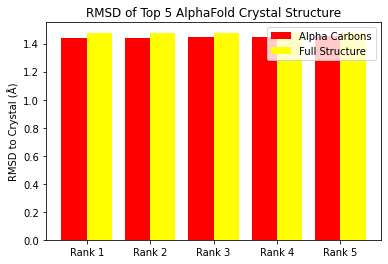

In [11]:
# Now we can plot the RMSD values
fig, ax = plt.subplots()
bar1=ax.bar(np.arange(len(rmsd_alpha_carbons))-0.2, rmsd_alpha_carbons, width=0.4,label='Alpha Carbons', color='red')
bar2=ax.bar(np.arange(len(rmsd_full_backbone))+0.2, rmsd_full_backbone, width=0.4,label='Full Structure', color='yellow')
ax.set_ylabel('RMSD to Crystal (Å)')

ax.set_title('RMSD of Top 5 AlphaFold Crystal Structure')
ax.set_xticks(np.arange(len(rmsd_alpha_carbons)))
ax.set_xticklabels([f'Rank {i}' for i in range(1,6)])
ax.legend()
plt.savefig('rmsd_plot.pdf')